### IMPORTING LIBRARIES, DICTIONARIES AND DEPENDENCIES

In [ ]:
# Downloading neccesary dependencies and restarting runtime, 

# Installing panda profiling requirements into my google collab
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# Installing squarify for a treemap visualization
!pip install squarify

import os
os.kill(os.getpid(), 9)

print('Runtime restarted, run next block')

In [189]:
# Importing required libraries
import nltk
import squarify
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
from google.colab import files
from pandas_profiling import ProfileReport
from textblob import TextBlob

# Setting visualization styles
%matplotlib inline


# Downloading necessary word dictionaries
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('brown')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

### IMPORTING DATASET

In [4]:
# Downloading the dataset from google drive
! gdown --id 1ex3oIOgefqLy-xjcvRzQ1zgCj_5k2jrv

Downloading...
From: https://drive.google.com/uc?id=1ex3oIOgefqLy-xjcvRzQ1zgCj_5k2jrv
To: /content/data job posts.csv
100% 96.0M/96.0M [00:00<00:00, 278MB/s]


In [5]:
# Creating a panda dataframe which will be use as raw data for reference
online_job_data = pd.read_csv('/content/data job posts.csv')
online_job_data.head()

jobpost  ...     IT
0  AMERIA Investment Consulting Company\r\nJOB TI...  ...  False
1  International Research & Exchanges Board (IREX...  ...  False
2  Caucasus Environmental NGO Network (CENN)\r\nJ...  ...  False
3  Manoff Group\r\nJOB TITLE:  BCC Specialist\r\n...  ...  False
4  Yerevan Brandy Company\r\nJOB TITLE:  Software...  ...   True

[5 rows x 24 columns]

### EXPLORATORY DATA ANALYSIS

In [ ]:
# Using panda profile to get an overview of the data
profile = ProfileReport(online_job_data, title="Online Job Dataset", html={'style': {'full_width': True}}, sort=None)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Check additional information about the dataframe

online_job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

### DATA CLEANING

In [6]:
# list of all the columns in the data
print (online_job_data.columns)

# Renaming the columns correctly
online_job_data = online_job_data.rename(columns = {
    "JobRequirment": "Job_Requirement",
    "RequiredQual": "Required_Qualification",
    "ApplicationP": "Application_Procedure",
     "AboutC" : "About_Company",
    'AnnouncementCode' : 'Announcement_Code',
    'OpeningDate' : 'Opening_Date',
    'JobDescription' : 'Job_Description',
    'OpeningDate' : 'Opening_Date',
    'StartDate' : 'Start_Date'
})

online_job_data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')


Index(['jobpost', 'date', 'Title', 'Company', 'Announcement_Code', 'Term',
       'Eligibility', 'Audience', 'Start_Date', 'Duration', 'Location',
       'Job_Description', 'Job_Requirement', 'Required_Qualification',
       'Salary', 'Application_Procedure', 'Opening_Date', 'Deadline', 'Notes',
       'About_Company', 'Attach', 'Year', 'Month', 'IT'],
      dtype='object')

From the EDA, some hypothesis about the dataset were made.
1. Jobpost column was extracted from various sources and was processed to create other columns. 
2. Since jobpost was extracted from various sources there are repeated entries of similar jobposts in its columns. 
3. Consequently, jobposts from the same company posted in the same year and month are duplicated.

Testing Hypothesis 1 - TRUE

In [7]:
online_job_data.iloc[0][0]

"AMERIA Investment Consulting Company\r\nJOB TITLE:  Chief Financial Officer\r\nPOSITION LOCATION: Yerevan, Armenia\r\nJOB DESCRIPTION:   AMERIA Investment Consulting Company is seeking a\r\nChief Financial Officer. This position manages the company's fiscal and\r\nadministrative functions, provides highly responsible and technically\r\ncomplex staff assistance to the Executive Director. The work performed\r\nrequires a high level of technical proficiency in financial management\r\nand investment management, as well as management, supervisory, and\r\nadministrative skills.\r\nJOB RESPONSIBILITIES:  \r\n- Supervises financial management and administrative staff, including\r\nassigning responsibilities, reviewing employees' work processes and\r\nproducts, counseling employees, giving performance evaluations, and\r\nrecommending disciplinary action;\r\n- Serves as member of management team participating in both strategic\r\nand operational planning for the company;\r\n- Directs and overse

In [8]:
online_job_data.iloc[0]

jobpost                   AMERIA Investment Consulting Company\r\nJOB TI...
date                                                            Jan 5, 2004
Title                                               Chief Financial Officer
Company                                AMERIA Investment Consulting Company
Announcement_Code                                                       NaN
Term                                                                    NaN
Eligibility                                                             NaN
Audience                                                                NaN
Start_Date                                                              NaN
Duration                                                                NaN
Location                                                   Yerevan, Armenia
Job_Description           AMERIA Investment Consulting Company is seekin...
Job_Requirement           - Supervises financial management and administ...
Required_Qua

Testing Hypothesis 2 - TRUE

In [9]:
# Checking for duplicate rows in the entire dataset

duplicated = online_job_data.duplicated().sum()
if duplicated:
    print('Duplicate rows in Dataset are {}'.format(duplicated))
else:
    print('Dataset contains no duplicate values')

Duplicate rows in Dataset are 39


In [10]:
# Checking for duplicate rows in every column

for i in online_job_data.columns:
  duplicated_data = online_job_data[i].duplicated().sum()
  unique_values = online_job_data[i].nunique()
  if duplicated_data:
    print('Duplicate rows in dataset at {} column are {} with {} unique items'.format(i, duplicated_data, unique_values))
  else: 
    print('Dataset contains no duplicate values in {}'.format(i))

Duplicate rows in dataset at jobpost column are 109 with 18892 unique items
Duplicate rows in dataset at date column are 14610 with 4391 unique items
Duplicate rows in dataset at Title column are 10364 with 8636 unique items
Duplicate rows in dataset at Company column are 14446 with 4554 unique items
Duplicate rows in dataset at Announcement_Code column are 17986 with 1014 unique items
Duplicate rows in dataset at Term column are 18589 with 411 unique items
Duplicate rows in dataset at Eligibility column are 18337 with 663 unique items
Duplicate rows in dataset at Audience column are 18784 with 216 unique items
Duplicate rows in dataset at Start_Date column are 17814 with 1186 unique items
Duplicate rows in dataset at Duration column are 17485 with 1515 unique items
Duplicate rows in dataset at Location column are 18241 with 759 unique items
Duplicate rows in dataset at Job_Description column are 6139 with 12861 unique items
Duplicate rows in dataset at Job_Requirement column are 4818 

Testing Hypothesis 3 - TRUE

In [11]:
# Checking for duplicate rows a dataset containing only Year, Month, Title, jobpost columns

multiple = online_job_data[['Year', 'Month', 'Company', 'Title', 'jobpost']]
multiple.duplicated().sum()

83

Since all hypothesis are true, we can clean by removing duplicates sequentially

### DROPPING DUPLICATE ROWS

In [12]:
# Dropping duplicate rows in the dataset sequentially

print(online_job_data.shape)
online_job_data = online_job_data.drop_duplicates()
print(online_job_data.shape)
online_job_data= online_job_data.drop_duplicates('jobpost', keep='first')
print(online_job_data.shape)
online_job_data = online_job_data.drop_duplicates(subset=['Year', 'Month', 'Company', 'Title'])
print(online_job_data.shape)

(19001, 24)
(18962, 24)
(18892, 24)
(18552, 24)


In [13]:
# Checking if duplicates were removed successfully

for i in online_job_data.columns:
  duplicated_data = online_job_data[i].duplicated().sum()
  unique_values = online_job_data[i].nunique()
  if duplicated_data:
    print('Duplicate rows in dataset at {} column are {} with {} unique items'.format(i, duplicated_data, unique_values))
  else: 
    print('Dataset contains no duplicate values in {}'.format(i))

Dataset contains no duplicate values in jobpost
Duplicate rows in dataset at date column are 14187 with 4365 unique items
Duplicate rows in dataset at Title column are 9915 with 8636 unique items
Duplicate rows in dataset at Company column are 13997 with 4554 unique items
Duplicate rows in dataset at Announcement_Code column are 17544 with 1007 unique items
Duplicate rows in dataset at Term column are 18141 with 410 unique items
Duplicate rows in dataset at Eligibility column are 17889 with 662 unique items
Duplicate rows in dataset at Audience column are 18335 with 216 unique items
Duplicate rows in dataset at Start_Date column are 17371 with 1180 unique items
Duplicate rows in dataset at Duration column are 17039 with 1512 unique items
Duplicate rows in dataset at Location column are 17803 with 748 unique items
Duplicate rows in dataset at Job_Description column are 5744 with 12807 unique items
Duplicate rows in dataset at Job_Requirement column are 4439 with 14112 unique items
Dupli

### THE DEMAND FOR CERTAIN PROFESSIONS AND JOB TITLES

Working towards demand for certain professions and titles, the columns with the required information are Title, IT, Month, Year.

In [14]:
# making a copy of job_title for manipulation and reference
job_demand = online_job_data[['Year', 'Month', 'Title', 'IT']]
job_demand

Year  Month                                              Title     IT
0      2004      1                            Chief Financial Officer  False
1      2004      1  Full-time Community Connections Intern (paid i...  False
2      2004      1                                Country Coordinator  False
3      2004      1                                     BCC Specialist  False
4      2004      1                                 Software Developer   True
...     ...    ...                                                ...    ...
18996  2015     12                    Senior Creative UX/ UI Designer  False
18997  2015     12                       Category Development Manager  False
18998  2015     12                      Operational Marketing Manager  False
18999  2015     12                    Head of Online Sales Department  False
19000  2015     12                         Lawyer in Legal Department  False

[18552 rows x 4 columns]

HANDLING MISSING DATA

Year      0
Month     0
Title    19
IT        0
dtype: int64


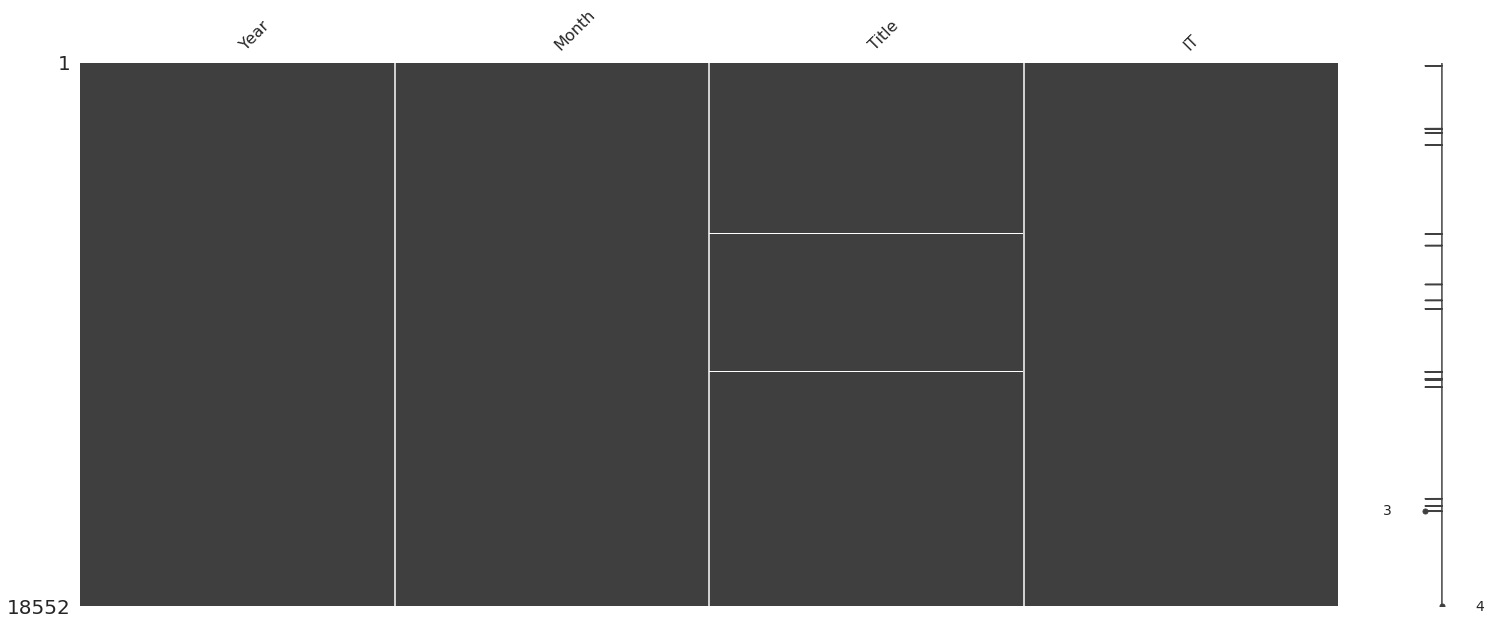

In [ ]:
# Visualizing missing data
print (job_demand.isnull().sum())
msno.matrix(job_demand)

In [15]:
# Dropping rows with null values using Title to specify the rows

print(job_demand.shape)
job_demand = job_demand.dropna(subset = ['Title'])
print(job_demand.shape)
job_demand.isnull().sum()

(18552, 4)
(18533, 4)


Year     0
Month    0
Title    0
IT       0
dtype: int64

In [ ]:
# using panda profile to get an overview of the job demand data and also see any errors in the cleaning
profile = ProfileReport(job_demand, title="Job Demand", html={'style': {'full_width': True}}, sort=None)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Demand of jobs per year from largest to smallest - 2012 had the highest demand for jobs

In [35]:
# Creating a dataframe for job demand by year

job_demand_by_year = pd.DataFrame(job_demand.Year.value_counts(sort = False).reset_index())
job_demand_by_year['Job Posts'] = job_demand_by_year.Year
job_demand_by_year['Year'] = job_demand_by_year['index']
job_demand_by_year = job_demand_by_year.drop('index', axis = 1)
job_demand_by_year

Year  Job Posts
0   2004        854
1   2005       1113
2   2006       1095
3   2007       1518
4   2008       1753
5   2009       1142
6   2010       1443
7   2011       1657
8   2012       2093
9   2013       1961
10  2014       1955
11  2015       1949

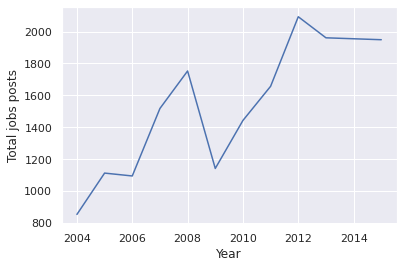

In [34]:
# Plotting a line chart to show the trend of job demand over the years

plt.plot('Year', 'Job Posts', data = job_demand_by_year)
plt.xlabel('Year')
plt.ylabel('Total jobs posts')
plt.show()

Demand of Jobs per month: - March has the highest number of job postings with a steady decline from September to December

In [36]:
# Creating a dataframe for job demand by month

job_demand_by_month = pd.DataFrame(job_demand.Month.value_counts(sort = False).reset_index())
job_demand_by_month['Job Posts'] = job_demand_by_month.Month
job_demand_by_month['Month'] = job_demand_by_month['index']
job_demand_by_month = job_demand_by_month.drop('index', axis=1)
job_demand_by_month

Month  Job Posts
0       1       1394
1       2       1602
2       3       1654
3       4       1435
4       5       1545
5       6       1640
6       7       1549
7       8       1578
8       9       1618
9      10       1598
10     11       1534
11     12       1386

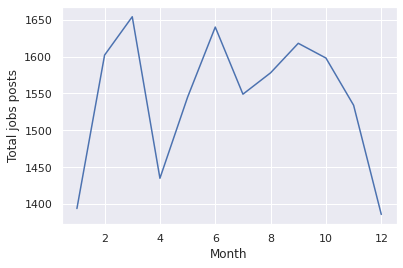

In [37]:
# Plotting a line chart to show the trend of job demand over months

plt.plot('Month', 'Job Posts', data = job_demand_by_month)
plt.xlabel('Month')
plt.ylabel('Total jobs posts')
plt.show()

Top 30 jobs between 2004 and 2015 - Accountant positions were highly demand for over the years.

In [46]:
# Creating a dataframe for job demand by title

job_demand_by_title = pd.DataFrame(job_demand.Title.value_counts().head(30).reset_index())
job_demand_by_title['Frequency'] = job_demand_by_title.Title
job_demand_by_title['Title'] = job_demand_by_title['index']
job_demand_by_title = job_demand_by_title.drop('index', axis=1)
job_demand_by_title = job_demand_by_title.sort_index()
job_demand_by_title

Title  Frequency
0                               Accountant        326
1                         Chief Accountant        218
2                   Medical Representative        212
3                            Sales Manager        164
4                 Administrative Assistant        155
5                                   Lawyer        151
6                       Software Developer        132
7                          Project Manager        116
8                            Web Developer         99
9                           Java Developer         87
10                    Marketing Specialist         86
11                          Office Manager         83
12                    System Administrator         74
13                        Graphic Designer         73
14                       Marketing Manager         70
15                   Senior Java Developer         69
16                       Software Engineer         67
17                             QA Engineer         65
18  Receptionist/ Administrative Assistant         64
19                           PHP Developer         61
20                Senior Software Engineer         60
21                     Executive Assistant         60
22                            Receptionist         60
23                        Internal Auditor         58
24                      Executive Director         57
25                              Programmer         55
26                           IT Specialist         55
27                                Designer         55
28                              Translator         54
29                           Brand Manager         53

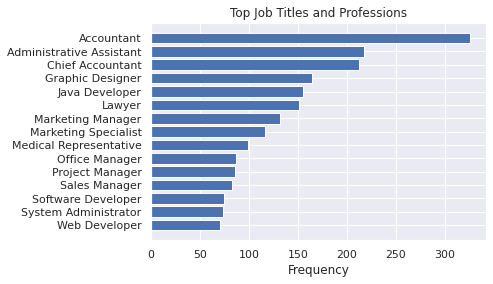

In [59]:
# Plotting a bar chart to show the top 15 jobs

plt.barh(job_demand_by_title['Title'].head(15).sort_values(ascending = False), job_demand_by_title['Frequency'].head(15).sort_values())
plt.xlabel('Frequency')
plt.title('Top Job Titles and Professions')
plt.show()

Top job per year - Accountants were mostly demanded for over many years, though there was greater demand for Medical Representatives in some years

In [71]:
# Creating a dataframe for job title by year

job_titles_by_year = pd.DataFrame(job_demand.groupby('Year').Title.describe())
job_titles_by_year['Year'] = job_titles_by_year.index
job_titles_by_year['Title'] = job_titles_by_year['top']
job_titles_by_year = job_titles_by_year.reset_index(drop = True)
job_titles_by_year = job_titles_by_year.sort_index()
job_titles_by_year

count unique                     top freq  Year                   Title
0    854    682              Accountant   16  2004              Accountant
1   1113    780              Accountant   27  2005              Accountant
2   1095    712              Accountant   27  2006              Accountant
3   1518    945              Accountant   41  2007              Accountant
4   1753   1172              Accountant   38  2008              Accountant
5   1142    810              Accountant   21  2009              Accountant
6   1443   1028  Medical Representative   33  2010  Medical Representative
7   1657   1095        Chief Accountant   26  2011        Chief Accountant
8   2093   1365  Medical Representative   28  2012  Medical Representative
9   1961   1264  Medical Representative   33  2013  Medical Representative
10  1955   1225              Accountant   31  2014              Accountant
11  1949   1180              Accountant   27  2015              Accountant

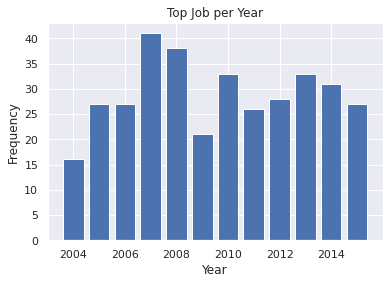

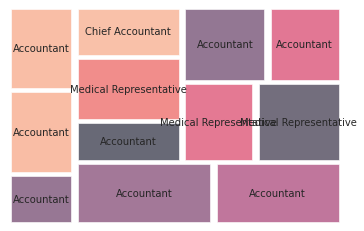

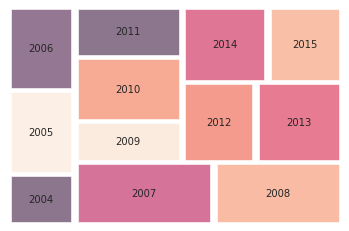

In [79]:
# Plotting a bar chart to show the top 15 jobs

plt.bar(job_titles_by_year['Year'], job_titles_by_year['freq'])
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Top Job per Year')
plt.show()

squarify.plot(job_titles_by_year['freq'], label = job_titles_by_year['Title'], pad = True, alpha = 0.6)
plt.axis('off')
plt.show()

squarify.plot(job_titles_by_year['freq'], label = job_titles_by_year['Year'], pad = True, alpha = 0.6)
plt.axis('off')
plt.show()

Top 5 jobs per year

In [ ]:
all_jobs_by_year = job_demand.groupby('Year')['Title'].value_counts()

# There are over 12258 rows in this result, so it would be difficult getting each year, so we a function was made to extract the rows and make it into a panda DataFrame

all_jobs_by_year.to_csv("all_jobs_by_year.csv")
files.download("all_jobs_by_year.csv")
all_jobs_by_year

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Year  Title                                                                                
2004  Accountant                                                                               16
      Administrative Assistant                                                                 14
      Chief Accountant                                                                         13
      Programmer                                                                               10
      Project Coordinator                                                                       7
                                                                                               ..
2015  Writer/ Translator/ Copy Editor                                                           1
      Yerevan Area Development Program Child Protection and Education                           1
      Yerevan Area Program Administrative Assistant                                             1
      Yerevan Area Program

In [126]:
# Functions were created to convert a groupby object to a dataframe selecting the top 5 jobs pair year

""" Function to extract the top n items from a groupby aggregation """
import operator

def count_title(groupby_object):
  titlelist = []
  for row in groupby_object:
    titlelist.append(row)
  # print (titlelist)
  unordered = {x:titlelist.count(x) for x in titlelist}
  # print ('@@@@')
  # print (unordered)
  ordered = dict( sorted(unordered.items(), key=operator.itemgetter(1), reverse=True))
  # print ('%%%%')
  # print (ordered)
  topitems = {A:N for (A,N) in [x for x in ordered.items()][:5]}# [:5] gives the top 5 key-value pairs
  twopitems = dict( sorted(topitems.items(), key=operator.itemgetter(1), reverse=True))
  # print (topitems)
  return (topitems)

""" Function to extract the element in the Dataframe object and assign then to specified columns """

def create_table(group):
  # print (group)
  toplist = []
  for k, v in group.items():
    # print ('{} '':'' {}'.format(k, v)) 
    toplist.append([k[0], k[1], v])
  toptitles = pd.DataFrame(toplist, columns =['Year', 'Title', 'Count'])
  return (toptitles)

In [ ]:
# jobs not in the top 5 were return with a count of NaN and the output is saved as csv and downloaded

top_5_jobs = job_demand.groupby('Year')['Title'].apply(count_title)
print (top_5_jobs.head(8))
top_5_jobs = top_5_jobs.dropna()
top_5_jobs.to_csv("Top5_jobs_yearly.csv")
files.download("Top5_jobs_yearly.csv")
top_5_jobs


Year                          
2004  Accountant                  16.0
      Administrative Assistant    14.0
      Chief Accountant            13.0
      Programmer                  10.0
      Project Coordinator          7.0
      Receptionist                 NaN
      Software Developer           NaN
      Medical Representative       NaN
Name: Title, dtype: float64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Year                          
2004  Accountant                  16.0
      Administrative Assistant    14.0
      Chief Accountant            13.0
      Programmer                  10.0
      Project Coordinator          7.0
2005  Accountant                  27.0
      Administrative Assistant    14.0
      Chief Accountant            16.0
      Receptionist                13.0
      Software Developer          13.0
2006  Accountant                  27.0
      Administrative Assistant    22.0
      Chief Accountant            20.0
      Software Developer          13.0
      Medical Representative      14.0
2007  Accountant                  41.0
      Administrative Assistant    18.0
      Chief Accountant            28.0
      Software Developer          16.0
      Java Developer              19.0
2008  Accountant                  38.0
      Chief Accountant            26.0
      Sales Manager               24.0
      System Administrator        16.0
      Lawyer                     

In [ ]:
# To make the data into a table for ease of visualization

top_5_jobs = pd.DataFrame(top_5_jobs) # The Dataframe with a single column as Title with key as Year and object of format (2004, 'Accountant') : 16.0
top_5_jobs_per_year = create_table(top_5_jobs['Title'])
#top_5_jobs_per_year.to_csv("Top_5_Jobs_Yearly")
top_5_jobs_per_year


                               Title
Year                                
2004 Accountant                 16.0
     Administrative Assistant   14.0
     Chief Accountant           13.0
     Programmer                 10.0
     Project Coordinator         7.0
2005 Accountant                 27.0
     Administrative Assistant   14.0
     Chief Accountant           16.0


Year                     Title  Count
0   2004                Accountant   16.0
1   2004  Administrative Assistant   14.0
2   2004          Chief Accountant   13.0
3   2004                Programmer   10.0
4   2004       Project Coordinator    7.0
5   2005                Accountant   27.0
6   2005  Administrative Assistant   14.0
7   2005          Chief Accountant   16.0
8   2005              Receptionist   13.0
9   2005        Software Developer   13.0
10  2006                Accountant   27.0
11  2006  Administrative Assistant   22.0
12  2006          Chief Accountant   20.0
13  2006        Software Developer   13.0
14  2006    Medical Representative   14.0
15  2007                Accountant   41.0
16  2007  Administrative Assistant   18.0
17  2007          Chief Accountant   28.0
18  2007        Software Developer   16.0
19  2007            Java Developer   19.0
20  2008                Accountant   38.0
21  2008          Chief Accountant   26.0
22  2008             Sales Manager   24.0
23  2008      System Administrator   16.0
24  2008                    Lawyer   16.0
25  2009                Accountant   21.0
26  2009          Chief Accountant   15.0
27  2009    Medical Representative   16.0
28  2009             Sales Manager   13.0
29  2009                    Lawyer   17.0
30  2010                Accountant   22.0
31  2010          Chief Accountant   13.0
32  2010    Medical Representative   33.0
33  2010             Sales Manager   14.0
34  2010                    Lawyer   13.0
35  2011                Accountant   23.0
36  2011          Chief Accountant   26.0
37  2011    Medical Representative   22.0
38  2011             Sales Manager   12.0
39  2011         Software Engineer   12.0
40  2012                Accountant   24.0
41  2012        Software Developer   18.0
42  2012    Medical Representative   28.0
43  2012             Sales Manager   26.0
44  2012                    Lawyer   24.0
45  2013                Accountant   29.0
46  2013          Chief Accountant   17.0
47  2013    Medical Representative   33.0
48  2013             Sales Manager   18.0
49  2013             PHP Developer   17.0
50  2014                Accountant   31.0
51  2014        Software Developer   17.0
52  2014    Medical Representative   16.0
53  2014             Sales Manager   25.0
54  2014           Project Manager   18.0
55  2015                Accountant   27.0
56  2015          Chief Accountant   17.0
57  2015             Web Developer   20.0
58  2015             iOS Developer   19.0
59  2015     Senior Java Developer   19.0

Demand for IT jobs by year

In [151]:
# The distribution of job types through the years
job_type = job_demand.groupby('Year')['IT'].value_counts()
job_type

Year  IT   
2004  False     713
      True      141
2005  False     910
      True      203
2006  False     876
      True      219
2007  False    1205
      True      313
2008  False    1423
      True      330
2009  False     989
      True      153
2010  False    1227
      True      216
2011  False    1335
      True      322
2012  False    1629
      True      464
2013  False    1588
      True      373
2014  False    1499
      True      456
2015  False    1454
      True      495
Name: IT, dtype: int64

In [152]:
# To make the data into a table for ease of visualization

job_type = create_table(job_type)
job_type

Year  Title  Count
0   2004  False    713
1   2004   True    141
2   2005  False    910
3   2005   True    203
4   2006  False    876
5   2006   True    219
6   2007  False   1205
7   2007   True    313
8   2008  False   1423
9   2008   True    330
10  2009  False    989
11  2009   True    153
12  2010  False   1227
13  2010   True    216
14  2011  False   1335
15  2011   True    322
16  2012  False   1629
17  2012   True    464
18  2013  False   1588
19  2013   True    373
20  2014  False   1499
21  2014   True    456
22  2015  False   1454
23  2015   True    495

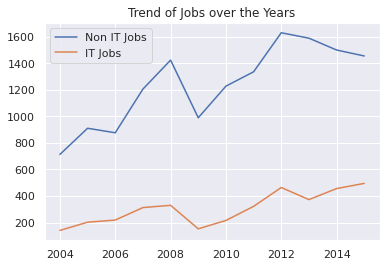

In [153]:
# Plotting a line chart with 2 lines should the trends of Non IT jobs and IT jobs

x = job_type['Year'].unique()
y1 = job_type.loc[job_type['Title'] == False]['Count']
y2 = job_type.loc[job_type['Title'] == True]['Count']
plt.plot(x, y1, label = "Non IT Jobs")
plt.plot(x, y2, label = "IT Jobs")
plt.title('Trend of Jobs over the Years')
plt.legend()
plt.show()

### TEXTUAL DATA PROCESSING

In [154]:
 # FUNCTIONS - Functions were created to process text data to extract common noun phrases in a column

""" Function used TextBlob to process textual data and return a list of noun phrases """

def get_noun_phrases(text):
    blob = TextBlob(text)
    noun_phrases = blob.noun_phrases
    np_dict = {}
    
    # To remove some recurring words which are hence, not skills
    for phrase in noun_phrases:
        if phrase not in np_dict:
            np_dict[phrase] = 1
        else:
            np_dict[phrase] += 1
    return [i for i in np_dict if np_dict[i]==1]

In [187]:
""" Functions used extract top 50 skills by default into a dictionary with keys as related job titles """

def get_skills_title(data, skills_column, title, top = 50):
  all_skills = {}
  for index, row in data.iterrows():
      row_title = row['Title']
      row_skills = row[skills_column]
      noun_phrases = get_noun_phrases(row_skills)
      if row_title in all_skills:
          all_skills[row_title] += noun_phrases
      else:
          all_skills[row_title] = noun_phrases
  title_skills = get_recurring_skills(all_skills[title], top)
  return (title_skills)

""" Functions used extract top 50 skills by default into a dictionary with keys as related job years """

def get_skills_years(data, skills_column, year, top = 50):
  all_skills = {}
  for index, row in data.iterrows():
      row_year = row['Year']
      row_skills = row[skills_column]
      noun_phrases = get_noun_phrases(row_skills)
      if row_year in all_skills:
          all_skills[row_year] += noun_phrases
      else:
          all_skills[row_year] = noun_phrases
  year_skills = get_recurring_skills(all_skills[year], top)
  return (year_skills)

In [156]:
""" Functions used to filter commonnest unique noun phrases """

def get_recurring_skills(title_skills, no_of_top_skills):
    df = pd.DataFrame()
    df['skills'] = [i.lower().strip() for i in title_skills]
    df.set_index("skills")
    df = df['skills'].value_counts()
    return df[:no_of_top_skills]

### IDENTIFYING SKILLS REQUIRED BY EMPLOYERS

In [168]:
# Making a copies of online_job_data for manipulation and reference
job_description = online_job_data[['date','Year', 'Month', 'Company', 'Title', 'IT', 'Job_Description']]
job_requirements = online_job_data[['date','Year', 'Month', 'Company', 'Title', 'IT', 'Job_Requirement']]
required_qualification = online_job_data[['date','Year', 'Month', 'Company', 'Title', 'IT', 'Required_Qualification']]
print ('Successfully copied')

Successfully copied


(18552, 7)
date                  0
Year                  0
Month                 0
Company               5
Title                19
IT                    0
Job_Description    3755
dtype: int64


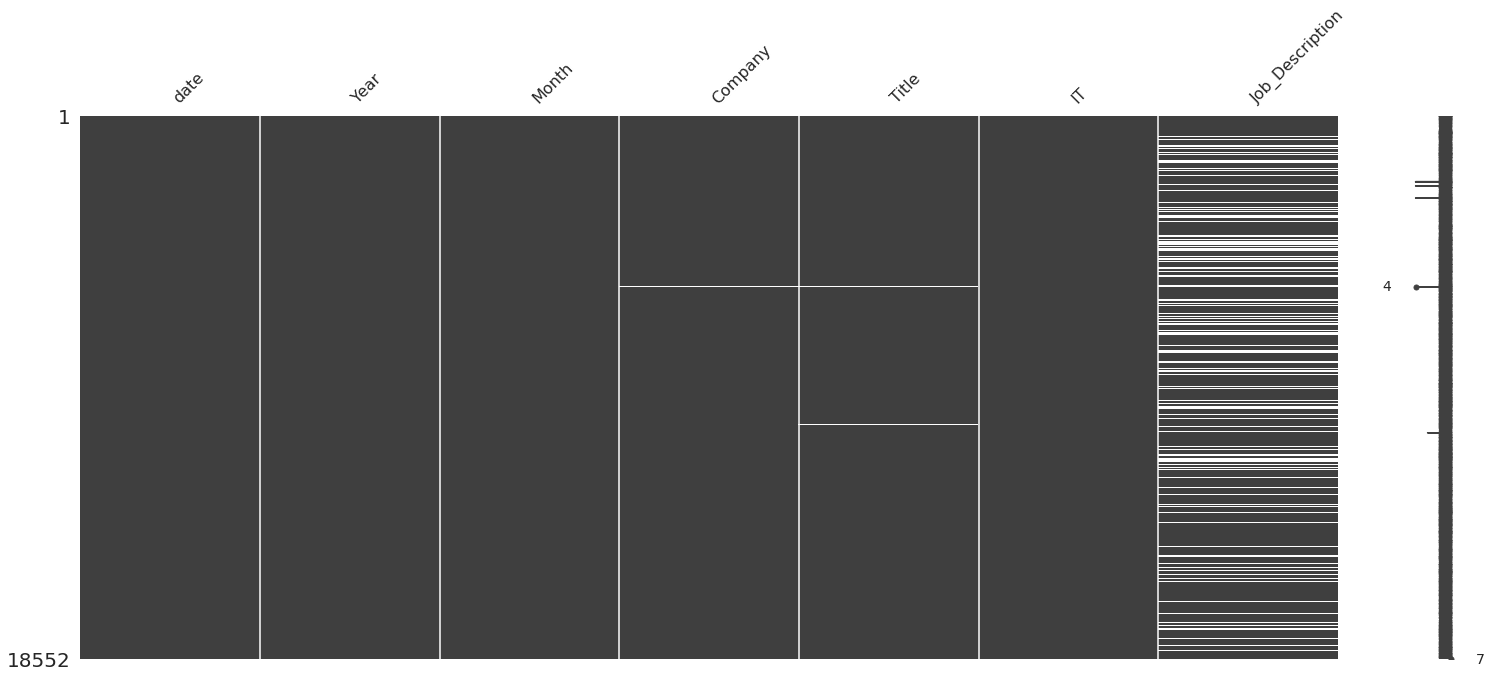

In [169]:
# Visualizing missing data in Job_Description
print (job_description.shape)
print (job_description.isnull().sum())
msno.matrix(job_description)

(18552, 7)
date                  0
Year                  0
Month                 0
Company               5
Title                19
IT                    0
Job_Requirement    2405
dtype: int64


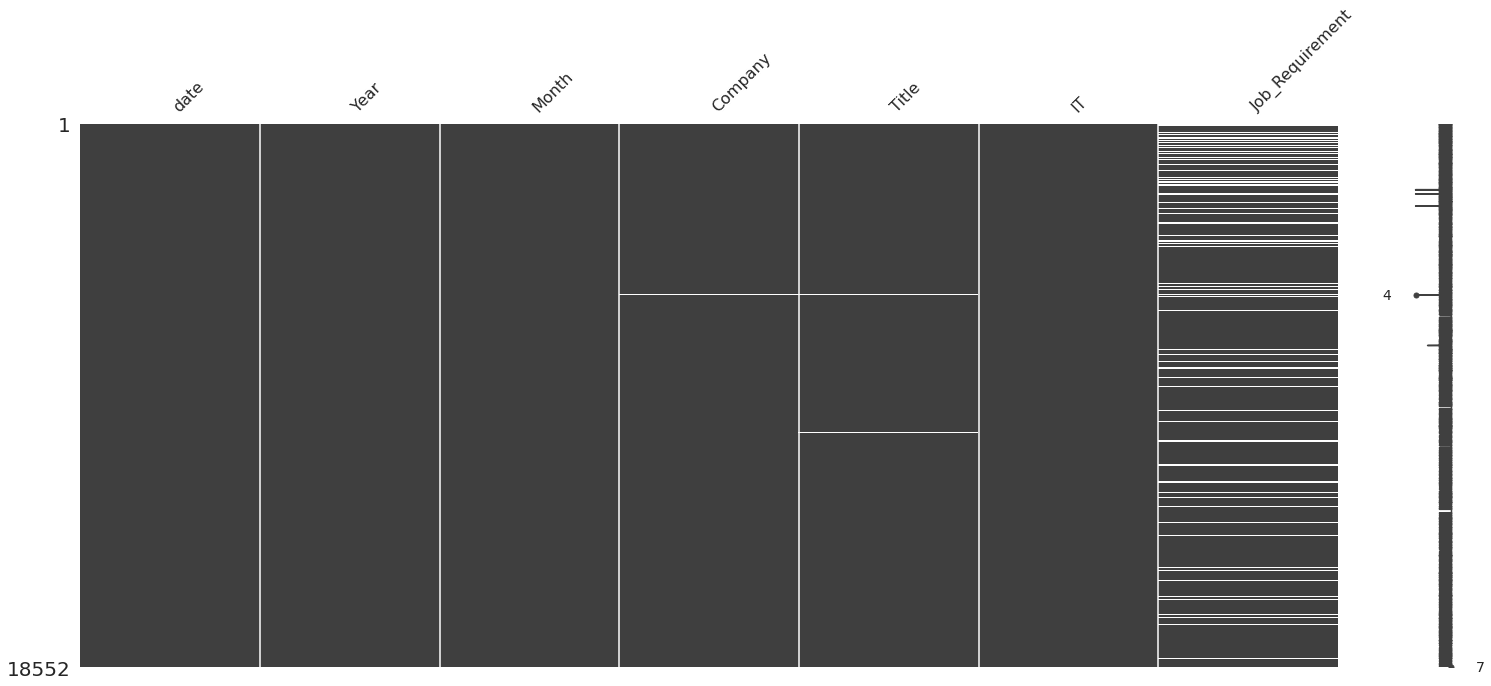

In [170]:
# Visualizing missing data in Job_Requirements
print (job_requirements.shape)
print (job_requirements.isnull().sum())
msno.matrix(job_requirements)

(18552, 7)
date                        0
Year                        0
Month                       0
Company                     5
Title                      19
IT                          0
Required_Qualification    405
dtype: int64


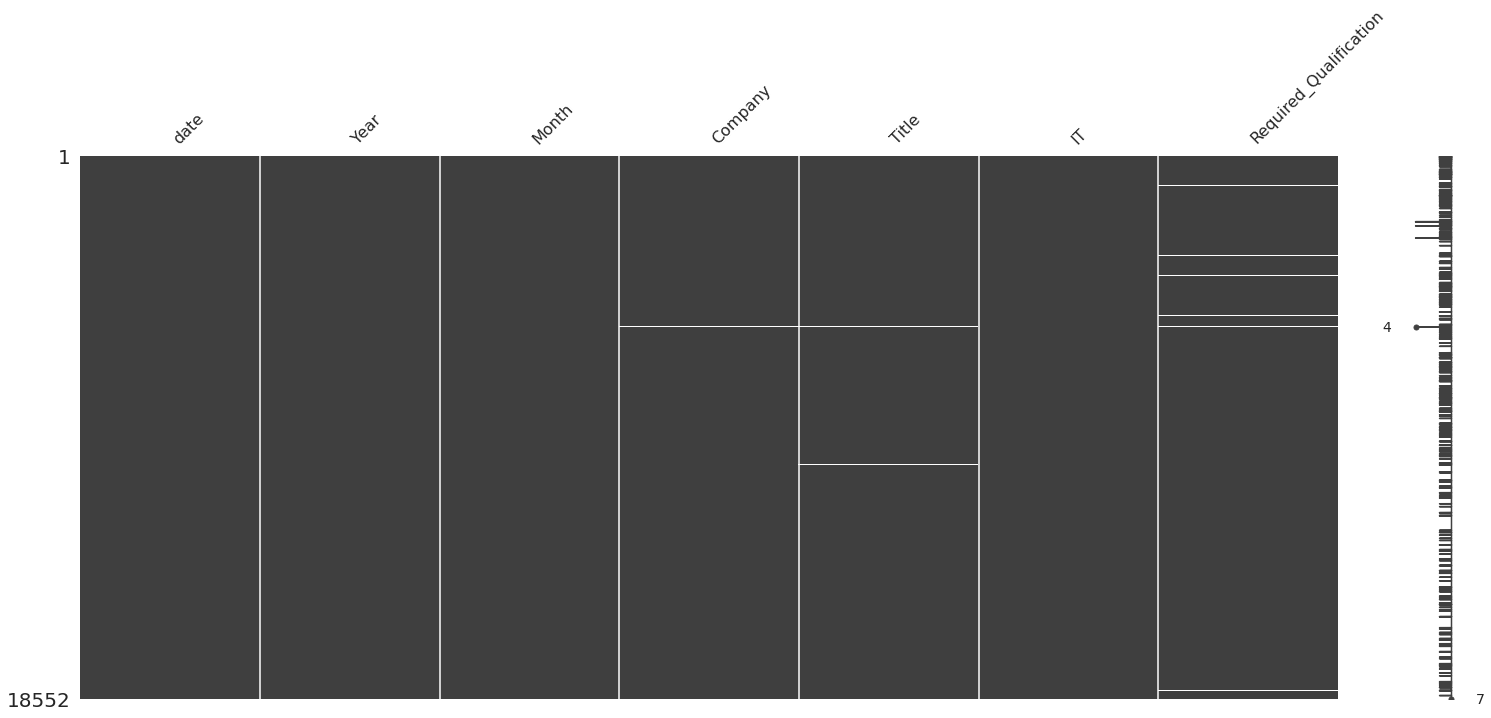

In [171]:
# Visualizing missing data in Required_Qualification
print (required_qualification.shape)
print (required_qualification.isnull().sum())
msno.matrix(required_qualification)

In [172]:
# Dropping missing rows in Job_Description

print(job_description.shape)
job_description = job_description.dropna()
job_description = job_description.reset_index(drop = True)
print(job_description.shape)
job_description.isnull().sum()

(18552, 7)
(14784, 7)


date               0
Year               0
Month              0
Company            0
Title              0
IT                 0
Job_Description    0
dtype: int64

In [173]:
# Dropping missing rows in Job_Requirements

print(job_requirements.shape)
job_requirements = job_requirements.dropna()
job_requirements = job_requirements.reset_index(drop = True)
print(job_requirements.shape)
job_requirements.isnull().sum()

(18552, 7)
(16134, 7)


date               0
Year               0
Month              0
Company            0
Title              0
IT                 0
Job_Requirement    0
dtype: int64

In [174]:
# Dropping missing rows in Required_Qualification

print(required_qualification.shape)
required_qualification = required_qualification.dropna()
required_qualification = required_qualification.reset_index(drop = True)
print(required_qualification.shape)
required_qualification.isnull().sum()

(18552, 7)
(18133, 7)


date                      0
Year                      0
Month                     0
Company                   0
Title                     0
IT                        0
Required_Qualification    0
dtype: int64

In [182]:
# Checking the top 10 result of text processing the columns in Job_Description for the most demanded job

accountant_noun_phrases = get_skills_title(job_description, 'Job_Description', 'Accountant', 20)
accountant_noun_phrases

accountant                          163
armenia                              23
llc                                  14
professional candidate               13
proactive candidate                  12
financial                            11
direct supervision                   11
yerevan                              10
financial reports                    10
position holder                       8
senior accountant                     8
icjsc                                 7
cjsc                                  6
western-style office environment      6
team goals                            6
airports                              6
accountants                           5
journal entries                       5
company 's                            5
ra                                    5
Name: skills, dtype: int64

In [184]:
# Checking the top 10 result of text processing the columns in Job_Requirements for the most demanded job

accountant_noun_phrases = get_skills_title(job_requirements, 'Job_Requirement', 'Accountant', 20)
accountant_noun_phrases

prepare                   99
perform                   98
maintain                  65
assist                    44
provide                   42
accountant                39
financial reports         35
implement                 33
ensure                    32
monitor                   32
financial transactions    28
handle                    28
responsible               24
financial statements      23
ra                        23
conduct                   22
tax reports               21
financial                 20
journal entries           20
record                    19
Name: skills, dtype: int64

In [186]:
# Checking the top 10 result of text processing the columns in Required_Qualification for the most demanded job

accountant_noun_phrases = get_skills_title(required_qualification, 'Required_Qualification', 'Accountant', 20)
accountant_noun_phrases

english                 235
work experience         126
university degree       119
knowledge               114
ms                      103
excellent               100
ability                  90
russian languages        87
fluency                  82
software                 82
excel                    75
good knowledge           75
economics                59
strong                   58
computer                 53
experience               51
standards                49
communication skills     45
minimum                  45
acca                     44
Name: skills, dtype: int64

From the results, Required_Qualification results were more in tune with skills required by employers for a particular job position

In [190]:
# Making a Dataframe containing the top 50 skills required by employers for the top 15 jobs - Processing takes 10 mins to display a dataframe

titleskills = {}
for i in required_qualification['Title'].value_counts().head(15).index:
  skills = get_skills_title(required_qualification, 'Required_Qualification', i)
  titleskills[i] = skills

skills_by_title = pd.DataFrame(titleskills)

skills_by_title

Accountant  ...  Marketing Manager
1c program              NaN  ...                NaN
3d architecture         NaN  ...                NaN
ability                90.0  ...               24.0
academic                NaN  ...                NaN
acca                   44.0  ...                NaN
...                     ...  ...                ...
word processing         NaN  ...                NaN
work experience       126.0  ...               15.0
working                 NaN  ...                NaN
xhtml                   NaN  ...                NaN
xml                     NaN  ...                NaN

[291 rows x 15 columns]

In [ ]:
# Converting Dataframe of skills_by_title to a csv for export and download for visualization

skills_by_title.to_csv("Skills_distribution_by_title")
files.download("Skills_distribution_by_title")

### DISTRIBUTION OF NECESSARY SKILLS OVER TIME

In [188]:
# Making a Dataframe containing the top 50 skills required by employers over the years - Processing takes 10 mins to display a dataframe

yearskills = {}
for i in required_qualification['Year'].unique():
  skills = get_skills_years(required_qualification, 'Required_Qualification', i)
  yearskills[i] = skills


skills_by_year = pd.DataFrame(yearskills)

skills_by_year

2004   2005   2006   2007  ...   2012   2013   2014   2015
ability            133.0  211.0  257.0  414.0  ...  684.0  609.0  634.0  640.0
advanced            49.0   60.0   73.0  105.0  ...  141.0  181.0  182.0  168.0
ajax                 NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
analytical           NaN    NaN    NaN   55.0  ...  125.0  135.0  116.0  115.0
analytical skills    NaN   47.0    NaN   77.0  ...  124.0  122.0  109.0   95.0
...                  ...    ...    ...    ...  ...    ...    ...    ...    ...
work experience     95.0  240.0  480.0  432.0  ...  709.0  630.0  554.0  601.0
working             30.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
xml                  NaN    NaN   43.0   63.0  ...    NaN    NaN    NaN    NaN
year experience      NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN
years experience    91.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN

[94 rows x 12 columns]

In [ ]:
# Converting Dataframe of skills_by_year to a csv for export and download for visualization

skills_by_year.to_csv("Skills_distribution_by_year")
files.download("Skills_distribution_by_year")

In [191]:
skills_by_year_transposed = skills_by_year.T # or df2.transpose()
skills_by_year_transposed

ability  advanced  ajax  ...   xml  year experience  years experience
2004    133.0      49.0   NaN  ...   NaN              NaN              91.0
2005    211.0      60.0   NaN  ...   NaN              NaN               NaN
2006    257.0      73.0   NaN  ...  43.0              NaN               NaN
2007    414.0     105.0   NaN  ...  63.0              NaN               NaN
2008    474.0     179.0   NaN  ...   NaN              NaN               NaN
2009    299.0     155.0   NaN  ...   NaN             67.0               NaN
2010    446.0     126.0   NaN  ...   NaN             93.0               NaN
2011    545.0     114.0  65.0  ...  70.0              NaN               NaN
2012    684.0     141.0   NaN  ...   NaN              NaN               NaN
2013    609.0     181.0   NaN  ...   NaN              NaN               NaN
2014    634.0     182.0   NaN  ...   NaN              NaN               NaN
2015    640.0     168.0   NaN  ...   NaN              NaN               NaN

[12 rows x 94 columns]

In [206]:
# The list of necessary skills over the years

skills_by_year_transposed.columns

Index(['ability', 'advanced', 'ajax', 'analytical', 'analytical skills',
       'armenia', 'armenian language', 'armenian languages', 'availability',
       'bachelor 's degree', 'basic knowledge', 'bs',
       'business administration', 'c++', 'communication',
       'communication skills', 'computer', 'computer skills', 'css', 'degree',
       'demonstrated', 'economics', 'engineering', 'english', 'excel',
       'excellent', 'experience', 'extensive', 'familiarity', 'fluency',
       'fluent', 'good communication skills', 'good computer skills',
       'good knowledge', 'good team player', 'high sense', 'html',
       'international organizations', 'internet', 'interpersonal skills', 'it',
       'java', 'javascript', 'knowledge', 'language skills', 'linux',
       'management', 'master 's degree', 'mba', 'microsoft', 'minimum', 'ms',
       'ms excel', 'ms windows', 'multiple tasks', 'mysql',
       'negotiation skills', 'office tools', 'oop', 'oracle',
       'organizational skill

In [209]:
# Creating a dictionary of lists to make a line chart per list

skills = {
    'true_skills' : [ 'analytical', 'analytical skills', 'communication skills', 
          'computer skills',  'good communication skills', 'good computer skills',
          'good team player', 'interpersonal skills', 'language skills', 'microsoft',  
          'negotiation skills', 'organizational skills', 'presentation skills', 
          ]
    ,
    'programming_languages' : [ 'ajax', 'c++', 'css', 'html', 'java', 'javascript', 
          'linux', 'mysql', 'oop', 'oracle', 'perl', 'php', 'sql', 'xml', 'windows'
          ]
    ,
    'spoken_languages' : [ 'armenian languages', 'english', 'russian', 'russian languages' 
            ] 
    ,
    'education' : [ 'bachelor \'s degree', 'master \'s degree', 'professional experience',
          'relevant experience', 'relevant work experience', 'university degree', 
          'work experience', 'year experience', 'years experience'        
    ]
    ,
    'microsoft' : [ 'ms', 'ms excel', 'excel', 'outlook', 'powerpoint',  'ms windows', 'office tools',
                
    ]
}

skills

{'education': ["bachelor 's degree",
  "master 's degree",
  'professional experience',
  'relevant experience',
  'relevant work experience',
  'university degree',
  'work experience',
  'year experience',
  'years experience'],
 'microsoft': ['ms',
  'ms excel',
  'excel',
  'outlook',
  'powerpoint',
  'ms windows',
  'office tools'],
 'programming_languages': ['ajax',
  'c++',
  'css',
  'html',
  'java',
  'javascript',
  'linux',
  'mysql',
  'oop',
  'oracle',
  'perl',
  'php',
  'sql',
  'xml',
  'windows'],
 'spoken_languages': ['armenian languages',
  'english',
  'russian',
  'russian languages'],
 'true_skills': ['analytical',
  'analytical skills',
  'communication skills',
  'computer skills',
  'good communication skills',
  'good computer skills',
  'good team player',
  'interpersonal skills',
  'language skills',
  'microsoft',
  'negotiation skills',
  'organizational skills',
  'presentation skills']}

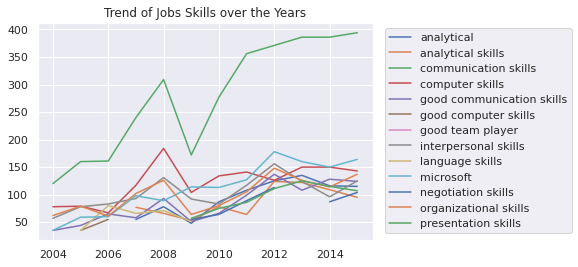

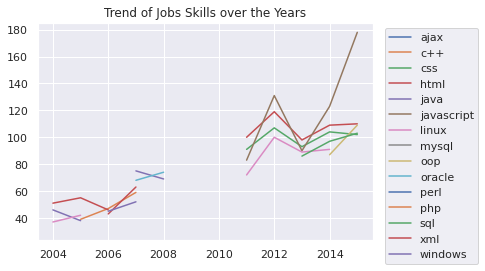

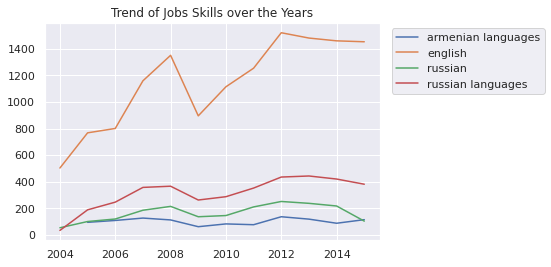

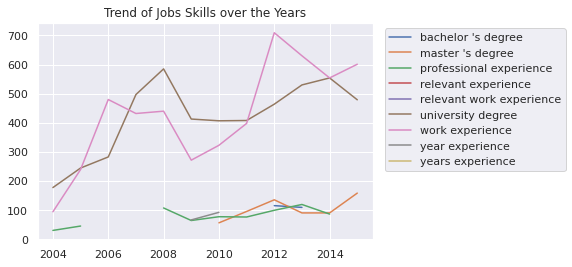

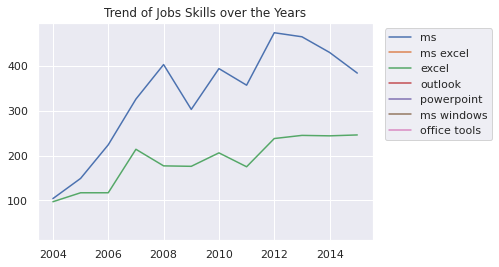

In [231]:
# Plotting a line chart showing the trend of skills over years

x = skills_by_year_transposed.index
for k in skills.keys():
  w = skills[k]
  for i in w:
    y = skills_by_year_transposed[i]
    plt.plot(x, y, label = i)
  plt.legend(bbox_to_anchor= (1.02, 1))
  plt.title('Trend of Jobs Skills over the Years')
  plt.show()